# Linear Algebra in Python

In [92]:
# Dependencies and modules

import pandas as pd
import numpy as np
import statistics
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop


## Dot Product

Dot product is a way to multiply vectors where the product is an integer value. This value is a scalar that describes the moment of the two vectors. The formula allows for x,y coordinate data or vector magnitudes as inputs.

$$ v \cdot w = (x_{1}x_{2})\cdot(y_{1}y_{2}) = x_{1}y_{1} + x_{2}y_{2} = \parallel v \parallel \cdot \parallel w \parallel cos\alpha $$

## Cross Product

Where dot product multiplies vectors to find a single value that represents the moment, the cross product multiplies vectors in such a way as to produce a third vector that describes the dimensional relationship between the vectors. The product vector is perpendicular to both the input vectors. Cross product outputs the ceiling that caps the walls of your two input vectors.

$$ A \times B =   \parallel A \parallel \parallel B \parallel sin\theta n $$





## 2. Write a function angle_between(v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated.

In [86]:
# defining my function
def angle_between(v1,v2):
# Per dot product formula, (A.B=||A||*||B||*cos(x)) where vector A is 2i and vector B is 3i+4j, 
# X is theta of angle between vectors.
# So, I have to use numpy's linear algebra (linalg) module to find the 
# components I need for the formula.
# I will start with finding the dot product with np.dot().
    try:
        dotprod = np.dot(v1,v2)
# Now I have to find the magnitude of the vectors. I will us np.linalg.norm.
        v1_mag = np.linalg.norm(v1)
        v2_mag = np.linalg.norm(v2)
# Now I am multiplying the magnitudes and setting up the division that will let me solve for the angle:        
        divisor = v1_mag * v2_mag
        #global ratio 
# 'global' was needed at one point in time because I reference this value again outside the block. Later code revisions 
# seem to not need this line, but I'm commenting it out rather than deleting it jic. 
        ratio = dotprod/divisor
        #np.seterr(invalid='ignore')
# I want to build in a way to call out the ZeroDivide error, since it is likely to occur. Using 'except ZeroDivisionError: print(blah blah)'
# didn't work because 'nan' was being printed instead of ZeroDivisionError.
        if divisor == 0:
            return ("Cannot divide by a zero magnitude.")
# To find theta, you use the numpy arccos function   
        else:
            theta = np.arccos(ratio)
            return theta
# This is to handle all other exceptions:
    except Exception as e: 
        return(e)
    #finally:
        #return('Ready for next input.') 
        # I wanted to use this, but it keeps my theta from being printed and I cannot figure out why.

In [87]:
# Testing my function:
# Should produce a theta value for the angle
s = np.array([3,4,5])
s2 = np.array([7,8,9])
# Should fail because ZeroDivide
w = np.array([0,0,0])
w2 = np.array([0,0,0])
# Should fail because matrices are different sized
t = np.array([5,3,7,6])
t2 = np.array([8,2,1,])
# Should produce a theta value for the angle
r = np.array([1,2,3])
r2 = np.array([4,5,6])
# Supress 'invalid value encountered in true_divide' RuntimeWarning
np.seterr(invalid='ignore')


print(angle_between(s,s2))
print(angle_between(w,w2))
print(angle_between(t,t2))
print(angle_between(r,r2))

0.09964803182965676
Cannot divide by a zero magnitude.
shapes (4,) and (3,) not aligned: 4 (dim 0) != 3 (dim 0)
0.2257261285527342


## 3. Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0).


In [27]:
# global values for my matrix:
A = np.array([[7,6,1,3],
             [3,2,4,5],
             [1,2,9,3],
             [7,3,5,1]])

# defining my function
def row_dot(A, r1, r2):
    
# dot product formula: (A.B=||A||*||B||*cos(x)) where vector A is 2i and vector B is 3i+4j
# I want to take a matrix and isolate two rows, then treat those rows as arrays or vectors
# and multiply them to find a scalar value.
# Per instructions, I am to use a 3x3 matrix .


#     for i in range(len(n)):
#         print(i, n[i-1])    <--- thought maybe looping thru for any row in A?
    try:
        dotprod = np.dot(A[r1-1],A[r2-1])
# # To find the dot product, I use the numpy .dot()  
#         else: 
#             return(dotprod)
# I need to build in a way to handle ZeroDivide error:           
    except ZeroDivisionError: 
        return("Cannot divide by zero")

    except Exception as e:
            return(e)
# To find the dot product, I use the numpy .dot()  
    else: 
        return(dotprod)

In [30]:
# Calling the function
row_dot(A,2,3)

58

In [31]:
# testing that my function calculated the desired dot product
test = np.dot(A[1],A[2])
print(test)

58


## 4. Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division?


In [40]:
# Defining some matrices:
P = np.array([[3,4,5,6],
             [7,6,2,1],
             [2,4,6,8],
             [1,3,5,7]])
A = np.array([[7,6,1,3],
             [3,2,4,5],
             [1,2,9,3],
             [7,3,5,1]])

# Defining my function:

def matrix_division(m1, m2):
#The trick to matrix division is simply multiplying one matrix by the inverse of the other. 
# We can get the inverse of a matrix by using Numpy's linalg function .invers()
    try:
        x = np.linalg.inv(m2)
        result = (m1 * x)
        return result
    except Exception as e:
        return e


In [39]:
matrix_division(P, A)

array([[-0.26335878,  0.40712468, -0.75699746,  1.2519084 ],
       [ 2.03053435, -1.49618321,  0.39185751, -0.21119593],
       [-0.09160305, -0.19338422,  0.65648855,  0.40712468],
       [-0.02671756,  0.83206107, -0.37531807, -0.56997455]])

## 5. Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol, and 0 otherwise. 


In [80]:
# Define my function:
def is_orthogonal(v1,v2,tol):
    try:
        if v1.shape != v2.shape:
            return('Vectors must be of equal length')
        elif tol <= 0:
            return('Scalar value must be larger than 0')
# Before calculations can proceed, the column vectors have to be converted
# into traditional vectors or arrays to properly handle the desired operations.
# I will do this with the .ravel() function.
        else:
            angle = np.arccos((np.dot(v1.ravel(),v2.ravel()))/(np.linalg.norm(v1)*np.linalg.norm(v2)))
            if abs(np.pi/2-angle)<tol:
                return('1')
            else:
                return('0')
    except Exception as e:
        return e

In [81]:
# Testing error handling:
e = np.array([[6], [7], [8]])
f = np.array([[9], [10], [11]])
u = np.array([[12], [13], [14], [15]])

is_orthogonal(e,u,0.01)

'Vectors must be of equal length'

In [82]:
is_orthogonal(e,f,0)

'Scalar value must be larger than 0'

In [83]:
# Test cases for problem 5
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])

# output: 1
is_orthogonal(a,b, 0.01)


'1'

In [84]:
# output: 0
is_orthogonal(a,b, 0.001)


'0'

In [85]:

# output: 0
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
is_orthogonal(a,b, 0.01)


'0'

In [49]:

# output: 1
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
is_orthogonal(a,b, 1e-10)

'1'

## 6.  Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside of it that are from problems 1 and 4 above (angle_between and is_orthogonal). Make sure tol is defaulted but can be overwritten. Make sure you can call angle_between and is_orthogonal through the class and return the correct results as in problems 2 and 5. 

In [75]:
# Creating a class introduces the self element, which I have to 
# use carefully so that I can call my functions in the class.
class vector_calculator():
    def __init__(self, vector1, vector2):
        self.v1=np.ravel(vector1)
        self.v2=np.ravel(vector2)

# my angle_between function from problem 2:        
    def angle_between(self):
    
        v1 = self.v1
        v2 = self.v2
        
        try:
            dotprod = np.dot(v1,v2)
            v1_mag = np.linalg.norm(v1)
            v2_mag = np.linalg.norm(v2)
            divisor = v1_mag * v2_mag
            ratio = dotprod/divisor
            if divisor == 0:
                return ("Cannot divide by a zero magnitude.")
  
            else:
                theta = np.arccos(ratio)
                return theta
        
        except Exception as e: 
            return(e)
 # is_orthogonal function from problem 5:   
    def is_orthogonal(self, tol=0):
        v1 = self.v1
        v2 = self.v2 
        try:
            if len(v1) != len(v2):
                return('Vectors must be of equal length')
            elif tol <= 0:
                return('Scalar value must be larger than 0')

            else:
                angle = np.arccos((np.dot(v1.ravel(),v2.ravel()))/(np.linalg.norm(v1)*np.linalg.norm(v2)))
                if abs(np.pi/2-angle)<tol:
                    return('1')
                else:
                    return('0')
        except Exception as e:
            return e
    

                

In [74]:
v_1 = np.array([[2],[4],[6],[8]])
v_2 = np.array([[3],[5],[7],[9]])

c = vector_calculator(v_1,v_2)

print(c.angle_between())
print(c.is_orthogonal())
print(c.is_orthogonal(tol=0.5))

0.06380094676987083
Scalar value must be larger than 0
0


## 7. Show a graphical representation of the breast cancer data outlined in this reading https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python Be sure to describe what PCA is and incorporate the principal components in your plot. This is just exploratory, so there are many correct answers!

#### PCA, or primary component analysis, is used in unsupervised machine learning and works great for analyzing massive data sets. It does this by isolating just a few variables that have a high degree of variability and paring away those pieces of data with low variability. It takes just the meat out of the data sandwich, if you will. Then smashes the meat flat and creates a collage out of it, then hangs the meat-collage on the wall. Maybe that's taking the analogy too far, but it sums up PCA work.

In [98]:
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels, (569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape


(569, 31)

In [99]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
features    # << ---- Here you can see, this data set includes a lot of lettuce and tomato and onions and mayo...

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [100]:
breast_dataset.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [101]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)  # <---- This makes the data a little more meaningful to humans.

In [102]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [103]:
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features, or smashing the meat to make the collage
x.shape

(569, 30)

In [104]:
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [105]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [106]:
pca_breast = PCA(n_components=2)  # Meat is out of the sandwich
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail() # ready to display on the wall

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [109]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))


Explained variation per principal component: [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

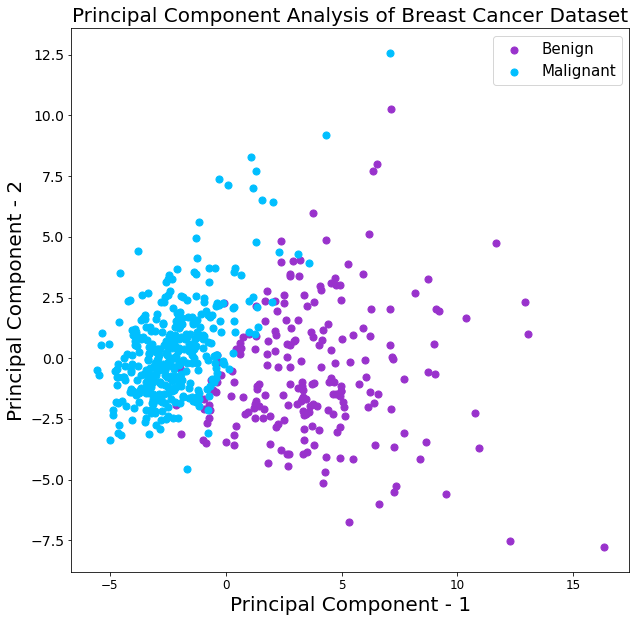

In [112]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['darkorchid', 'deepskyblue']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})